In [78]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [8]:
df = pd.read_csv(r"C:\Users\ranja\Documents\kagglehub\datasets\hr-data\HRDataset_v14.csv")

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [13]:
df.shape

(311, 36)

There are 311 rows and 36 columns in this dataset

In [19]:
df['EmpID'].nunique()

311

There are 311 employees in total

In [22]:
# Check null columns, found n
df.isnull().sum()[df.isnull().sum() > 0]

DateofTermination    207
ManagerID              8
dtype: int64

There are a few employees that do not have a manager which we will fix by just filling with 0. There are many employees with no termination date and those are currently active.

In [25]:
df['DateofTermination']=df['DateofTermination'].fillna('')
df['ManagerID']=df['ManagerID'].fillna(0).astype(int)

In [27]:
df['LastPerformanceReview_Date']=pd.to_datetime(df['LastPerformanceReview_Date'])
df['DateofHire']=pd.to_datetime(df['DateofHire'])
df['DateofTermination']=pd.to_datetime(df['DateofTermination'])

In [29]:
# Check the value counts of the  categorical columns
for col in df.select_dtypes(include=['category','object']):
    print(df[col].value_counts())

Employee_Name
Adinolfi, Wilson  K    1
O'hare, Lynn           1
Patronick, Lucas       1
Panjwani, Nina         1
Ozark, Travis          1
                      ..
Gerke, Melisa          1
Gentry, Mildred        1
Gaul, Barbara          1
Garcia, Raul           1
Zima, Colleen          1
Name: count, Length: 311, dtype: int64
Position
Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. Accountant                    2
Director of Ope

In [31]:
# To see the overall stats of the data
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
EmpID,311.0,10156.0,10001.0,10078.5,10156.0,10233.5,10311.0,89.922189
MarriedID,311.0,0.398714,0.0,0.0,0.0,1.0,1.0,0.490423
MaritalStatusID,311.0,0.810289,0.0,0.0,1.0,1.0,4.0,0.943239
GenderID,311.0,0.434084,0.0,0.0,0.0,1.0,1.0,0.496435
EmpStatusID,311.0,2.392283,1.0,1.0,1.0,5.0,5.0,1.794383
DeptID,311.0,4.610932,1.0,5.0,5.0,5.0,6.0,1.083487
PerfScoreID,311.0,2.977492,1.0,3.0,3.0,3.0,4.0,0.587072
FromDiversityJobFairID,311.0,0.093248,0.0,0.0,0.0,0.0,1.0,0.291248
Salary,311.0,69020.684887,45046.0,55501.5,62810.0,72036.0,250000.0,25156.63693
Termd,311.0,0.334405,0.0,0.0,0.0,1.0,1.0,0.472542


In [33]:
# Get a correlation matrix to see how different columns influence each other
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                           EmpID  MarriedID  MaritalStatusID  GenderID  \
EmpID                   1.000000   0.048058        -0.043851  0.035914   
MarriedID               0.048058   1.000000         0.164044 -0.024199   
MaritalStatusID        -0.043851   0.164044         1.000000 -0.030236   
GenderID                0.035914  -0.024199        -0.030236  1.000000   
EmpStatusID             0.073750   0.085619         0.114630 -0.032440   
DeptID                  0.107406  -0.119932         0.012768 -0.038838   
PerfScoreID            -0.691348  -0.058362         0.044693 -0.054915   
FromDiversityJobFairID  0.046805  -0.012708         0.041117  0.031493   
Salary                 -0.115319   0.026165        -0.070291  0.056097   
Termd                   0.092389   0.077028         0.099367 -0.015741   
PositionID             -0.036488  -0.027334         0.021923 -0.081612   
Zip                     0.026858  -0.041147         0.010620  0.048539   
ManagerID               0.093545  -0.0

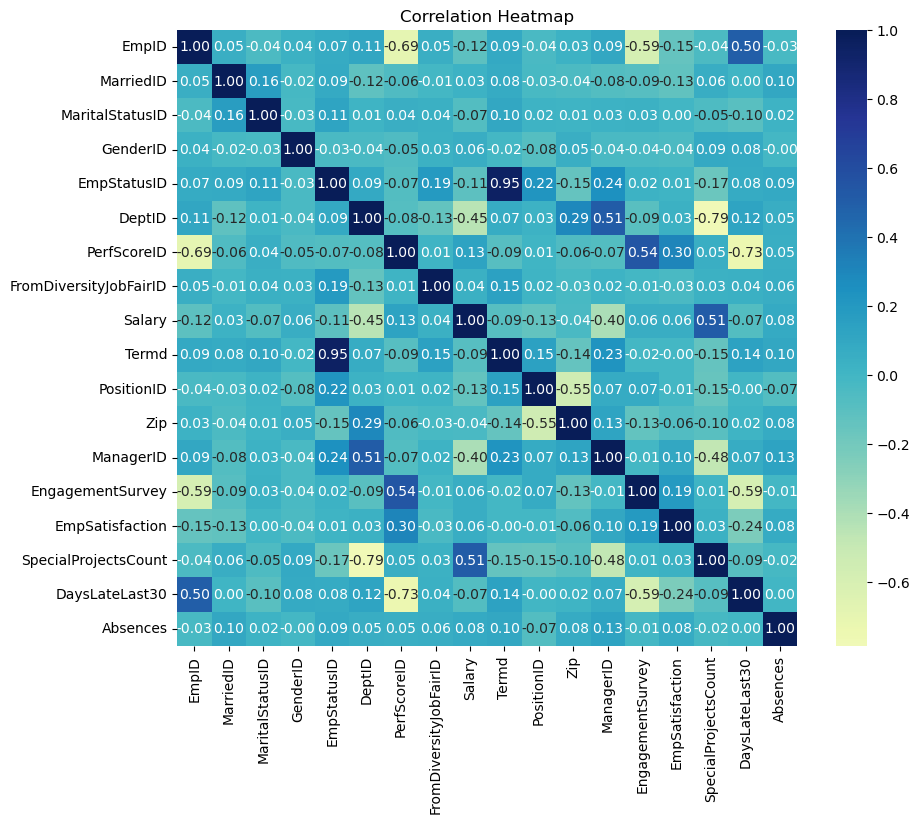

In [35]:
# Plot a simple heatmap showing the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", center=0)
plt.title("Correlation Heatmap")
plt.show()

The initial correlation map shows some interesting correlations between EngagementSurvey, PerfScoreID and DaysLateLast30.

In [44]:
# Take absolute value and unstack the matrix
cor_pairs = correlation_matrix.abs().unstack()

# Filter out self-correlations and duplicates
cor_pairs = cor_pairs[cor_pairs < 1.0].sort_values(ascending=False)
cor_pairs = cor_pairs[~cor_pairs.duplicated()]

# Get pairs with correlation above a threshold (e.g., 0.5)
high_corr = cor_pairs[cor_pairs > 0.5]
print(high_corr)

Termd                 EmpStatusID             0.948058
SpecialProjectsCount  DeptID                  0.785101
PerfScoreID           DaysLateLast30          0.734728
EmpID                 PerfScoreID             0.691348
EngagementSurvey      EmpID                   0.589664
                      DaysLateLast30          0.585232
PositionID            Zip                     0.552665
PerfScoreID           EngagementSurvey        0.544927
ManagerID             DeptID                  0.511331
Salary                SpecialProjectsCount    0.508333
dtype: float64


There are 2 meaningful correlation here which are between the pairs EngagementSurvey/DaysLateLast30 and Salary/SpecialProjectsCount

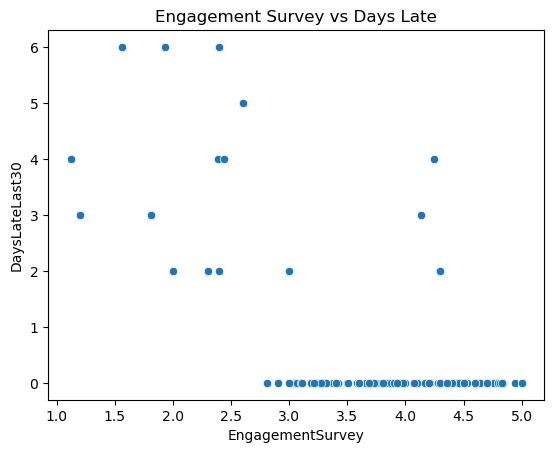

In [206]:
#Let us see how the plot between engagement survey and late days looks like
sns.scatterplot(data=df[df['Termd']==0], x='EngagementSurvey', y='DaysLateLast30')
plt.title("Engagement Survey vs Days Late")
plt.show()

Although there are a few outliers, for most cases it looks like there are more days late where the engagement score is less

In [59]:
# Salary by Race
df.groupby('RaceDesc')['Salary'].agg('median')

RaceDesc
American Indian or Alaska Native    66149.0
Asian                               64724.0
Black or African American           64069.0
Hispanic                            83667.0
Two or more races                   58709.0
White                               62068.0
Name: Salary, dtype: float64

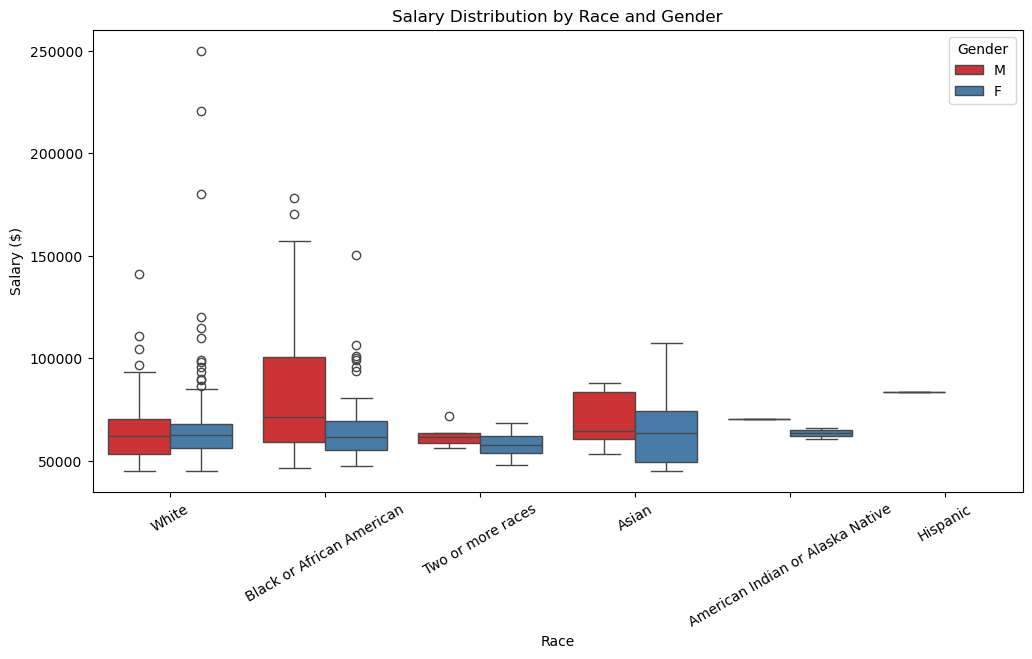

In [50]:
# Salary by race and gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='RaceDesc', y='Salary', hue='Sex', data=df, palette="Set1")
plt.title("Salary Distribution by Race and Gender")
plt.xlabel("Race")
plt.ylabel("Salary ($)")
plt.xticks(rotation=30)
plt.legend(title='Gender')
plt.show()

Although the salary distribution looks normal, the chart above does suggest that the diversity of women employees can be improved upon in some of the races such as Black of African American.

In [57]:
# Now, let us train a randomforest classification model to predict the performnace score of an employee. The first step would be to drop the columns 
# which are not relevant to this classification such as employee id, dob etc. Then, label encode all the categorical variables and then train the model
df_model=df.copy()
df_model = df.drop(columns=[
    'Employee_Name', 'EmpID', 'LastPerformanceReview_Date',
    'DateofHire', 'DOB', 'DateofTermination','PerfScoreID'
])
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['PerformanceScore'])
# Encode the categorical columns
df_encoded = df_model.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
    # Handle missing values
df_encoded = df_encoded.fillna(-1)
df_model=df_encoded.copy()

# Separate features and target
X = df_model.drop(columns=['PerformanceScore'])
y = df_model['PerformanceScore']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
classification_report_text = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report_text)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.90      1.00      0.95        54
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         0

    accuracy                           0.89        63
   macro avg       0.47      0.38      0.40        63
weighted avg       0.83      0.89      0.85        63



The model results show that it was successful with an accuracy of 89% and did very well with Class 1 which is the dominant class in the data set. It did not do that well with Class 2. Class imbalance might be the possoble cause for this with Class 1 having 54 samples and the others having <5. Some of the ways to fix this include running the model with class weight as balanced, or use oversampling techniques for minority class. Let us do that and examine the results.

<Axes: >

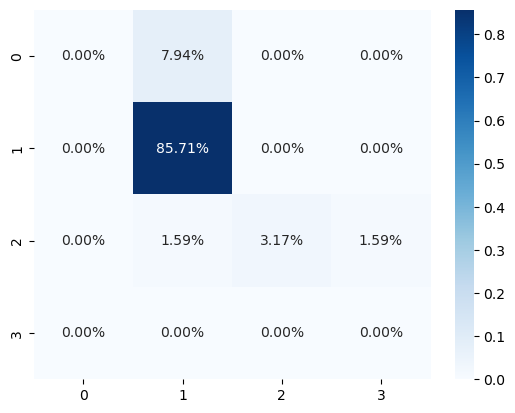

In [61]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [67]:
# Train RandomForest classifier with balanced weights
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
classification_report_text = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report_text)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.90      1.00      0.95        54
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         0

    accuracy                           0.89        63
   macro avg       0.47      0.38      0.40        63
weighted avg       0.83      0.89      0.85        63



Just setting the weights to balanced did not make a difference to the model. So let us try oversampling now

In [73]:
# Apply SMOTE after splitting
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Examine the distribution after oversampling
print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_balanced).value_counts())

# Then fit the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = clf.predict(X_test)
classification_report_text = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report_text)

Original class distribution:
 PerformanceScore
1    189
0     32
2     14
3     13
Name: count, dtype: int64
After SMOTE:
 PerformanceScore
1    189
0    189
3    189
2    189
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.91      0.89      0.90        54
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         0

    accuracy                           0.81        63
   macro avg       0.51      0.40      0.43        63
weighted avg       0.85      0.81      0.82        63



Although this shows some improvement, especially for class 0 and 2, but performance is still skewed heavily toward the majority class (1). 

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=skf, scoring='f1_macro')
print("Average F1 Macro Score:", scores.mean())

In [76]:
# Then fit the model
clf = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=200,max_depth=10,min_samples_leaf=3)
clf.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred = clf.predict(X_test)
classification_report_text = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report_text)

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.91      0.89      0.90        54
           2       1.00      0.50      0.67         4
           3       0.00      0.00      0.00         0

    accuracy                           0.81        63
   macro avg       0.51      0.40      0.43        63
weighted avg       0.85      0.81      0.82        63



In [80]:
# OPTIONAL: Remove label with zero instances (e.g., class 3 if unused)
label_counts = y.value_counts()
valid_labels = label_counts[label_counts > 0].index
X = X[y.isin(valid_labels)]
y = y[y.isin(valid_labels)]

# ----- STEP 2: Stratified Train/Test Split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ----- STEP 3: Apply SMOTE to Training Data -----
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ----- STEP 4: Train Model with Class Weight -----
clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=2
)
clf.fit(X_train_resampled, y_train_resampled)

# ----- STEP 5: Predict & Evaluate -----
y_pred = clf.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.14      0.17         7
           1       0.88      0.90      0.89        49
           2       0.60      0.75      0.67         4
           3       0.67      0.67      0.67         3

    accuracy                           0.79        63
   macro avg       0.59      0.61      0.60        63
weighted avg       0.78      0.79      0.78        63


Confusion Matrix:
[[ 1  6  0  0]
 [ 4 44  1  0]
 [ 0  0  3  1]
 [ 0  0  1  2]]


A quick interpretation of the results shows that the overall accuracy is 79% which is decent for an imbalanced set. Individually, the precision and recall for Class 1 is very high  but the model struggles for other classes. The model can be further improved by trying ensemble methods, feature selection and hyperparameter tuning by using grid search

                   Feature  Importance
26          DaysLateLast30    0.220199
23        EngagementSurvey    0.171898
24         EmpSatisfaction    0.097723
11                     Zip    0.068745
6                   Salary    0.054096
21               ManagerID    0.042555
16                RaceDesc    0.035130
20             ManagerName    0.029433
9                 Position    0.028007
8               PositionID    0.027680
27                Absences    0.027554
22       RecruitmentSource    0.027445
17              TermReason    0.027245
3              EmpStatusID    0.022663
1          MaritalStatusID    0.019173
13             MaritalDesc    0.016830
0                MarriedID    0.013645
18        EmploymentStatus    0.012781
12                     Sex    0.009270
7                    Termd    0.009250
2                 GenderID    0.008145
25    SpecialProjectsCount    0.006955
19              Department    0.006226
4                   DeptID    0.004740
14             CitizenDes

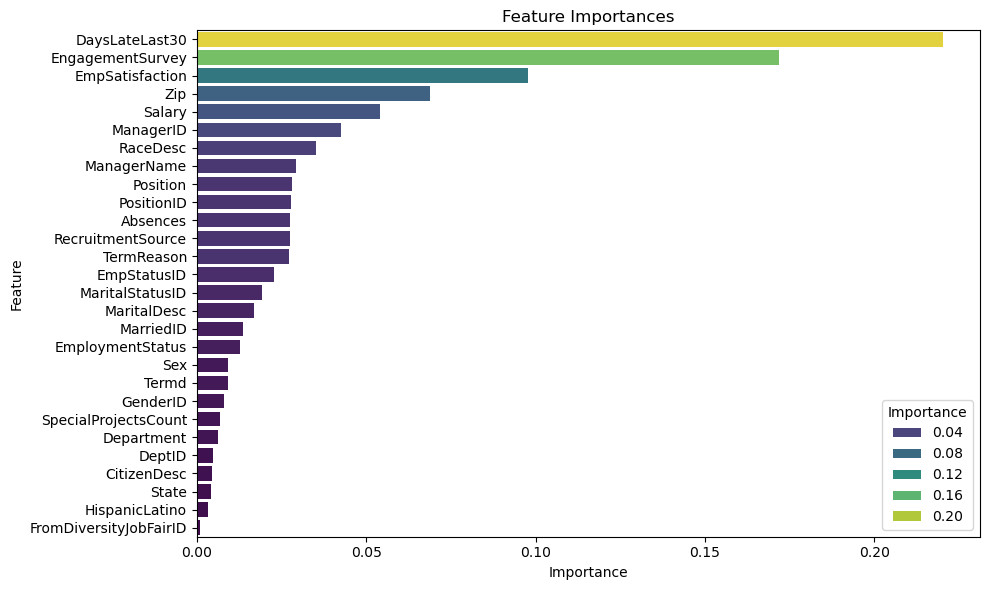

In [84]:
importances = clf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_imp_df)

# Visualize the feature importance displaying the influencers
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis',hue='Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Thus, this notebook demonstrates simple ways of performing basic EDA and using a machine learning model for a classification problem. The model can definitely be improved in a variety of different ways as discussed above.